# Auto-wah project

In [152]:
# Install libraries
! pip install audiolazy 
! pip install pyaudio
! pip install wave
! pip install scipy

  Running setup.py bdist_wheel for wave: started
  Running setup.py bdist_wheel for wave: finished with status 'done'
  Stored in directory: C:\Users\Me\AppData\Local\pip\Cache\wheels\8c\2e\ad\d96151afb1fdccf126346b26eabb91fec3c5ce5cbee7287fbf
Successfully built wave


In [1]:
# Imports
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
import string
import math

# Audio imports
import scipy.signal as sgn
from scipy.io import wavfile
import audiolazy as al
import pyaudio
import wave
import sys
from audiolazy import sHz, white_noise, line, resonator, AudioIO, Stream

# Helpers
from helpers import *

In [2]:
# Helpers
from helpers import *

# Parameters

Parameters : cuttof freq = milieu entre 500 et 4000
    , res = le 1000 a coté du bw

In [189]:
ma_width = 4000
window = 4000
order = 2

## Import wav file into NumPy array

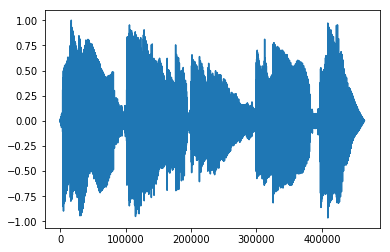

In [162]:
fs, data = wavfile.read('sample.wav') # get data as integers
MAX_VAL = abs(np.iinfo(data.dtype).min) # get max integer
data = data / MAX_VAL # now data is a normalized array of float between -1 and 1
data_length = data.size

plt.plot(data)
IPython.display.Audio(data, rate=fs)

## Compute the envelope of the signal (and set it to interesting freqs)

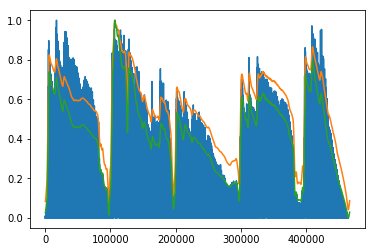

In [190]:
m_hat = abs(sgn.hilbert(data)) # Compute the hilbert transform

envelope = smooth(m_hat, ma_width) # Apply a moving average to smooth out the envelope
envelope /= envelope.max() # Normalize between 0 and 1
envelope **= 0.6 # Re-elevate the envelope
envelope = envelope[ma_width//2:]

envelope_log = np.exp(envelope)
envelope_log -= np.min(envelope_log)
envelope_log /= np.max(envelope_log)

plt.plot(abs(data))
plt.plot(envelope)
plt.plot(envelope_log)
plt.show()

## IIR Filter Method

In [163]:
y = np.zeros(len(data)+ order+1) # Create the y (order + 1 zeros at the begining to compute the 1st values...)
data = np.concatenate((np.zeros(order+1), data)) # add padded zeros at the beginning

vals_b = np.zeros(order+1)
vals_a = np.zeros(order+1)

464840

In [195]:
for i in range(order+1, len(y)): # begin at order+1 since we must use previous values (0)
    
    if(i%1000 == 0): # sinon trop lent
        b, a = sgn.iirfilter(
                  N=order,
                  Wn=(envelope_log[i] / 8),     
                  rp=30,
                  rs = 60,
                  btype='lowpass',
                  analog = False,
                  ftype='cheby1', 
                  output='ba')
    
    for j in range(0, order+1): # Compute X of the tranfer function
        vals_b[j] = b[j] * data[i-j]
        
    for j in range(1, order+1): # Compute Y of the tranfer function
        vals_a[j] = a[j] * y[i-j]
    
    y[i] = (1/a[0]) * ( np.sum(vals_b) - np.sum(vals_a) ) # Transfer function

# y = np.clip(y, -1, 1)

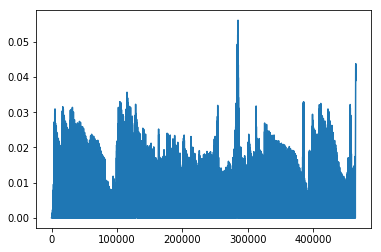

In [196]:
plt.plot(abs(y))
plt.show

IPython.display.Audio(y, rate=fs)

## STFT method

In [11]:
# STFT of signal

# nperseg = taille d'un chunk
f, t, Zxx = sgn.stft(x=data, fs=fs, nperseg=1024) 
# f = list the freqs des oscilalteurs
# t = list des temps de debut des fenetres.

Zxx = np.swapaxes(Zxx, 1, 0) 
# Zxx = list des chunks, pour chaque chunk, liste des valeurs des fréquences de la DFT.

num_chunks = t.size # ne pas oublier qu'ils s'overlapent a moitié

# Chunk envelopes list: 1 valeur d'enveloppe par chunk
env_repr = np.asarray([envelope[int(t[i]*fs)] for i in range(num_chunks)])

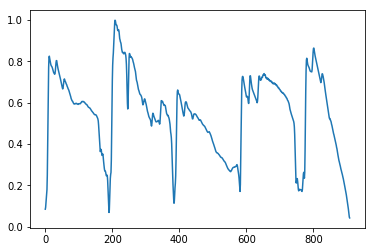

In [14]:
# Le plot des enveloppes representatives est le meme que l'enveloppe normale mais en moins précis
plt.plot(env_repr)

In [12]:
bob = np.zeros((num_chunks, f.size))

# MULTIPLIER LA STFT AVEC UNE LISTE QUI NEST PAS 0 SEULEMENT A L'INCICE CORRESPONDANT A L'ENVELOPPE

for i in range(0, t.size):
    bob[i] = Zxx[i] * 

SyntaxError: invalid syntax (<ipython-input-12-e34022f958df>, line 6)

In [ ]:
plt.plot(bob[2])